In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
training_path = "/content/gdrive/MyDrive/ML_Final/data/train"

file_names = os.listdir(training_path)

print(file_names[:10])


['10_jpg.rf.7c41153caebddbedea46488b511253d8.jpg', '203_jpg.rf.cb9e5f48eaebe54bea41135c867ecd0c.jpg', '1142_jpg.rf.5431f7d2e21a2af591f16a1562598c50.jpg', '763_jpg.rf.2d86cd3e1b2679ceaac26c10687747c3.jpg', '838_jpg.rf.0973dd0b9954a9fa5158234847d12c60.jpg', '992_jpg.rf.2e0369ecc044013c2e6a86b385ef9967.jpg', '836_jpg.rf.f2e0a9edee489c7e75a1f5db0382226a.jpg', '339_jpg.rf.7d13eb68c174bfb650e2897a7261b621.jpg', '572_jpg.rf.09147f128daa6fe587efd54d41d0de94.jpg', '512_jpg.rf.54f79d520c0bba8f92fd24b9f09041d9.jpg']


In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread(training_path +"/"+file_names[0])
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
new_img = img / 255.0
print(new_img)

[[0.23921569 0.23921569 0.23921569 ... 0.15294118 0.15294118 0.15294118]
 [0.23921569 0.23921569 0.23921569 ... 0.14509804 0.14509804 0.14117647]
 [0.23921569 0.23921569 0.23921569 ... 0.18431373 0.18039216 0.18039216]
 ...
 [0.51372549 0.51764706 0.51372549 ... 0.29411765 0.29411765 0.29411765]
 [0.50980392 0.51764706 0.51372549 ... 0.29411765 0.29411765 0.29411765]
 [0.50196078 0.50980392 0.50588235 ... 0.30588235 0.30196078 0.30196078]]


In [ ]:
print(new_img.shape)

(400, 400)


In [ ]:
import pandas as pd



classes_to_exclude = set();
for i in range(10):
  classes_to_exclude.add(' Numeric-'+str(i))

print(classes_to_exclude)


{' Numeric-2', ' Numeric-6', ' Numeric-3', ' Numeric-9', ' Numeric-4', ' Numeric-5', ' Numeric-8', ' Numeric-7', ' Numeric-0', ' Numeric-1'}


In [ ]:
image_dir = '/content/gdrive/MyDrive/ML_Final/data/train'


csv_file = '/content/gdrive/MyDrive/ML_Final/data/train_classes.csv'


labels_df = pd.read_csv(csv_file)

labels_df['label_column'] = labels_df.iloc[:, 1:].idxmax(axis=1)

labels_df = labels_df[~labels_df['label_column'].isin(classes_to_exclude)]
class_counts = labels_df['label_column'].value_counts()

print("-----------------Classwise Training Data------------------")
print(class_counts)
print("Total: " + str(len(labels_df)))

-----------------Classwise Training Data------------------
 Alphabet-A    651
 Alphabet-J    606
 Alphabet-H    594
 Alphabet-S    591
 Alphabet-M    582
 Alphabet-K    573
 Alphabet-B    573
 Alphabet-C    570
 Alphabet-N    558
 Alphabet-T    555
 Alphabet-F    555
 Alphabet-P    546
 Alphabet-L    540
 Alphabet-U    522
 Alphabet-Q    519
 Alphabet-I    507
 Alphabet-g    504
 Alphabet-R    495
 Alphabet-Z    492
 Alphabet-Y    486
 Alphabet-E    474
 Alphabet-V    471
 Alphabet-X    471
 Alphabet-W    468
 Alphabet-D    393
 Alphabet-O    393
Name: label_column, dtype: int64
Total: 13689


In [ ]:
test_image_dir = '/content/gdrive/MyDrive/ML_Final/data/test'


test_csv_file = '/content/gdrive/MyDrive/ML_Final/data/test_classes.csv'

test_labels_df = pd.read_csv(test_csv_file)


test_labels_df['label_column'] = test_labels_df.iloc[:, 1:].idxmax(axis=1)

test_labels_df = test_labels_df[~test_labels_df['label_column'].isin(classes_to_exclude)]
class_counts = test_labels_df['label_column'].value_counts()
print("-----------------Classwise Testing Data------------------")
print(class_counts)
print("Total: " + str(len(test_labels_df)))

-----------------Classwise Testing Data------------------
 Alphabet-F    71
 Alphabet-B    71
 Alphabet-V    70
 Alphabet-I    66
 Alphabet-g    65
 Alphabet-W    63
 Alphabet-T    62
 Alphabet-N    62
 Alphabet-C    61
 Alphabet-Q    61
 Alphabet-P    59
 Alphabet-M    59
 Alphabet-E    58
 Alphabet-R    58
 Alphabet-L    56
 Alphabet-U    55
 Alphabet-H    55
 Alphabet-A    54
 Alphabet-K    53
 Alphabet-J    53
 Alphabet-Y    52
 Alphabet-S    50
 Alphabet-D    46
 Alphabet-X    45
 Alphabet-O    41
 Alphabet-Z    40
Name: label_column, dtype: int64
Total: 1486


In [ ]:
valid_image_dir = '/content/gdrive/MyDrive/ML_Final/data/valid'


valid_csv_file = '/content/gdrive/MyDrive/ML_Final/data/valid_classes.csv'

valid_labels_df = pd.read_csv(valid_csv_file)

valid_labels_df['label_column'] = valid_labels_df.iloc[:, 1:].idxmax(axis=1)

valid_labels_df = valid_labels_df[~valid_labels_df['label_column'].isin(classes_to_exclude)]
class_counts = valid_labels_df['label_column'].value_counts()
print("-----------------Classwise Validation Data------------------")
print(class_counts)
print("Total: " + str(len(valid_labels_df)))

-----------------Classwise Validation Data------------------
 Alphabet-g    77
 Alphabet-L    77
 Alphabet-K    73
 Alphabet-I    72
 Alphabet-P    68
 Alphabet-S    68
 Alphabet-W    66
 Alphabet-R    63
 Alphabet-E    61
 Alphabet-A    60
 Alphabet-Q    60
 Alphabet-F    59
 Alphabet-B    59
 Alphabet-M    58
 Alphabet-H    57
 Alphabet-C    55
 Alphabet-V    54
 Alphabet-U    53
 Alphabet-Z    51
 Alphabet-N    48
 Alphabet-T    48
 Alphabet-X    47
 Alphabet-Y    47
 Alphabet-J    42
 Alphabet-D    40
 Alphabet-O    39
Name: label_column, dtype: int64
Total: 1502


In [ ]:



image_generator = ImageDataGenerator(rescale=1./255,
                                     shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)


data_generator = image_generator.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='filename',
    y_col='label_column',
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)

valid_image_generator = ImageDataGenerator(rescale=1./255)


valid_generator = valid_image_generator.flow_from_dataframe(
    dataframe=valid_labels_df,
    directory=valid_image_dir,
    x_col='filename',
    y_col='label_column',
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)



Found 13689 validated image filenames belonging to 26 classes.
Found 1502 validated image filenames belonging to 26 classes.


In [ ]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
## Loading VGG16 model
pretrainded_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
pretrainded_model.trainable = False ## Not trainable weights


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
prediction_layer = layers.Dense(26, activation='softmax')


model = models.Sequential([
    pretrainded_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Run the CNN model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Hist = model.fit(
        data_generator,
        epochs=25,
        validation_data = valid_generator,
      )

Epoch 1/25
214/214 [==============================] - 724s 3s/step - loss: 2.7587 - accuracy: 0.2764 - val_loss: 2.1518 - val_accuracy: 0.4674
Epoch 2/25
214/214 [==============================] - 57s 268ms/step - loss: 1.9931 - accuracy: 0.5057 - val_loss: 1.5592 - val_accuracy: 0.6438
Epoch 3/25
214/214 [==============================] - 58s 270ms/step - loss: 1.5748 - accuracy: 0.6178 - val_loss: 1.2525 - val_accuracy: 0.6744
Epoch 4/25
214/214 [==============================] - 57s 265ms/step - loss: 1.3178 - accuracy: 0.6773 - val_loss: 1.0349 - val_accuracy: 0.7270
Epoch 5/25
214/214 [==============================] - 59s 274ms/step - loss: 1.1325 - accuracy: 0.7249 - val_loss: 0.8525 - val_accuracy: 0.8029
Epoch 6/25
214/214 [==============================] - 61s 285ms/step - loss: 1.0143 - accuracy: 0.7507 - val_loss: 0.7375 - val_accuracy: 0.8429
Epoch 7/25
214/214 [==============================] - 58s 269ms/step - loss: 0.9135 - accuracy: 0.7761 - val_loss: 0.6761 - val_accu

In [ ]:
len(labels_df.columns)

37

In [ ]:
model.save("/content/gdrive/MyDrive/ML_Final/Transer_classifier_VGG16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
with open('/content/gdrive/MyDrive/ML_Final/history_Transer_classifier_VGG16.pkl', 'wb') as file:
    pickle.dump(Hist.history, file)

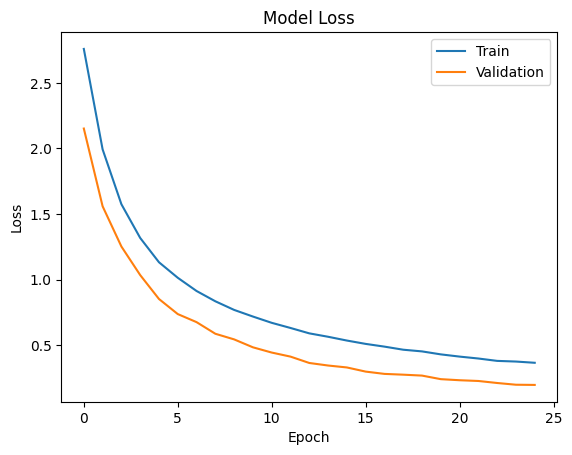

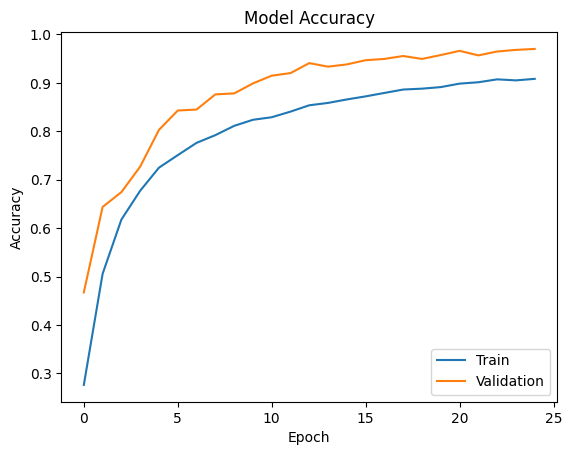

In [ ]:
import matplotlib.pyplot as plt
import pickle


with open('/content/gdrive/MyDrive/ML_Final/history_Transer_classifier_VGG16.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Save the loss plot
plt.savefig('/content/gdrive/MyDrive/ML_Final/ISRL_26_loss_plot.png')
plt.show()

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Save the accuracy plot
plt.savefig('/content/gdrive/MyDrive/ML_Final/ISRL_26_accuracy_plot.png')
plt.show()


In [ ]:
valid_labels_df[:5]

,filename,Alphabet-A,Alphabet-B,Alphabet-C,Alphabet-D,Alphabet-E,Alphabet-F,Alphabet-H,Alphabet-I,Alphabet-J,...,Numeric-1,Numeric-2,Numeric-3,Numeric-4,Numeric-5,Numeric-6,Numeric-7,Numeric-8,Numeric-9,label_column
0,2_jpg.rf.00b2816e1e4703f4a68925c4272847dd.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Numeric-2
1,60_jpg.rf.0055225d7459438c4a34d670070ed85b.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Numeric-8
2,401_jpg.rf.0079a16d641c92be87ffd0bfa845aaa5.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alphabet-B
3,920_jpg.rf.00db5c209af6c04725b9bd70ed01a853.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Numeric-2
4,321_jpg.rf.00e5ee63e4e2bd1069f60c43021893d0.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alphabet-N


In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = load_model('/content/gdrive/MyDrive/ML_Final/Transer_classifier_VGG16.h5')


valid_data_dir = '/content/gdrive/MyDrive/ML_Final/data/valid'

valid_csv_file = '/content/gdrive/MyDrive/ML_Final/data/valid_classes.csv'

valid_labels_df = pd.read_csv(valid_csv_file)
valid_labels_df['label_column'] = valid_labels_df.iloc[:, 1:].idxmax(axis=1)
valid_image_generator = ImageDataGenerator(rescale=1./255)
classes_to_exclude = set();
for i in range(10):
  classes_to_exclude.add(' Numeric-'+str(i))

print(classes_to_exclude)
valid_labels_df = valid_labels_df[~valid_labels_df['label_column'].isin(classes_to_exclude)]


valid_data_generator = valid_image_generator.flow_from_dataframe(
    dataframe=valid_labels_df,
    directory=valid_data_dir,
    x_col='filename',
    y_col='label_column',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


evaluation = model.evaluate(valid_data_generator)


print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")


{' Numeric-2', ' Numeric-6', ' Numeric-3', ' Numeric-9', ' Numeric-4', ' Numeric-5', ' Numeric-8', ' Numeric-7', ' Numeric-0', ' Numeric-1'}
Found 1502 validated image filenames belonging to 26 classes.
47/47 [==============================] - 5s 93ms/step - loss: 0.1975 - accuracy: 0.9700
Loss: 0.19749511778354645
Accuracy: 0.970039963722229


Found 1040 validated image filenames belonging to 26 classes.
32/32 [==============================] - 257s 8s/step
Class 0 - Precision: 1.0, Recall: 0.875
Class 1 - Precision: 1.0, Recall: 1.0
Class 2 - Precision: 1.0, Recall: 0.975
Class 3 - Precision: 1.0, Recall: 0.95
Class 4 - Precision: 0.9069767441860465, Recall: 0.975
Class 5 - Precision: 1.0, Recall: 0.9
Class 6 - Precision: 1.0, Recall: 1.0
Class 7 - Precision: 0.975609756097561, Recall: 1.0
Class 8 - Precision: 1.0, Recall: 0.95
Class 9 - Precision: 0.975609756097561, Recall: 1.0
Class 10 - Precision: 0.975609756097561, Recall: 1.0
Class 11 - Precision: 0.9302325581395349, Recall: 1.0
Class 12 - Precision: 1.0, Recall: 0.9166666666666666
Class 13 - Precision: 1.0, Recall: 1.0
Class 14 - Precision: 0.9090909090909091, Recall: 1.0
Class 15 - Precision: 0.975609756097561, Recall: 1.0
Class 16 - Precision: 1.0, Recall: 0.975
Class 17 - Precision: 1.0, Recall: 1.0
Class 18 - Precision: 1.0, Recall: 0.95
Class 19 - Precision: 1.0,

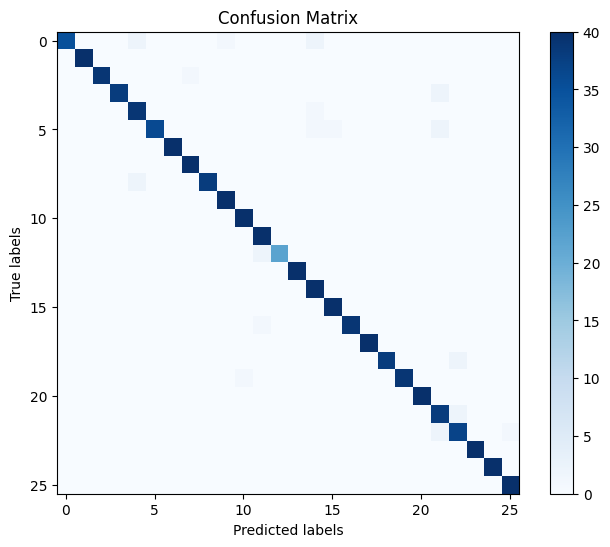

Overall Precision: 0.9762
Overall Recall: 0.9746
Overall F1-score: 0.9754


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt


balanced_df = pd.read_csv('/content/gdrive/MyDrive/ML_Final/balanced_data.csv')


image_dir = '/content/gdrive/MyDrive/ML_Final/data/test/'


test_datagen = ImageDataGenerator(rescale=1. / 255)

batch_size = 32
target_size = (64, 64)


test_generator = test_datagen.flow_from_dataframe(
    dataframe=balanced_df,
    directory=image_dir,
    x_col='filename',
    y_col='label_column',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False


model = load_model('/content/gdrive/MyDrive/ML_Final/Transer_classifier_VGG16.h5')


num_samples = balanced_df.shape[0]
num_steps = num_samples // batch_size

predicted_labels = model.predict(test_generator, steps=num_steps, verbose=1)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Get true labels
true_labels = test_generator.classes[:num_steps * batch_size]

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

unique_classes = np.unique(true_labels)


# Initialize lists to store precision and recall for each class
precision_per_class = []
recall_per_class = []


for cls in unique_classes:
    cls_true_labels = (true_labels == cls)
    cls_predicted_labels = (predicted_classes == cls)


    precision = precision_score(cls_true_labels, cls_predicted_labels)
    recall = recall_score(cls_true_labels, cls_predicted_labels)


    precision_per_class.append(precision)
    recall_per_class.append(recall)

for i, cls in enumerate(unique_classes):
    print(f"Class {cls} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}")




plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


overall_precision = precision_score(true_labels, predicted_classes, average='weighted')
overall_recall = recall_score(true_labels, predicted_classes, average='weighted')
overall_f1_score = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall)

print(f'Overall Precision: {overall_precision:.4f}')
print(f'Overall Recall: {overall_recall:.4f}')
print(f'Overall F1-score: {overall_f1_score:.4f}')
